# Clustering

Clustering 是屬於 Unsupervised learning 的一種，而 Unsupervised learning 算法是使用輸入向量從數據集推斷，而不參考已知或標記的結果

Clustering 最後會希望是群內彼此很相近，而群與群間則是盡可能的相異

分群與分類的差別在於，分類是在已知的類別（標記）下，替新的東西進行分類，分群則是在不知道資料類別（標記）的情況下，直接使用資料的特徵來進行分類

主要實作內容是：

- K-means

- Hierarchical Clustering

- DBSCAN

會使用到的套件

- numpy
- pandas 
- matplotlib
- sklearn
- scipy
- mglearn

# K-means

K-means 是一種常用的分群演算法，其目標很簡單：將相似的數據點組合在一起並發現底層模式

為了要實現這一目標，K-means 會在數據集中查找固定數量（K）的聚類
 
K-means 算法識別 k 個質心，然後將每個數據點分配給最近的群，同時保持質心盡可能小。

k-means 是屬於**原型為基礎（prototype-based）**這一類的分群，這表示每一群是由一個原型來表示

特性是集群不會重疊，也不舉有階層性，並假設每個群體中至少有一個樣本

K-means clustering 可以總結為四個步驟：

- 從樣本點中隨機挑選 k 個質心作為初始集群中心
- 指定每個樣本到它最近的質心
- 移動質心到被分配它的樣本點的中心
- 重複步驟 2 和 3 ，直到各群分配不再改變，或是達到所定義的**可容許誤差**，或是達到所定義的**最大迭代次數**

In [1]:
import mglearn

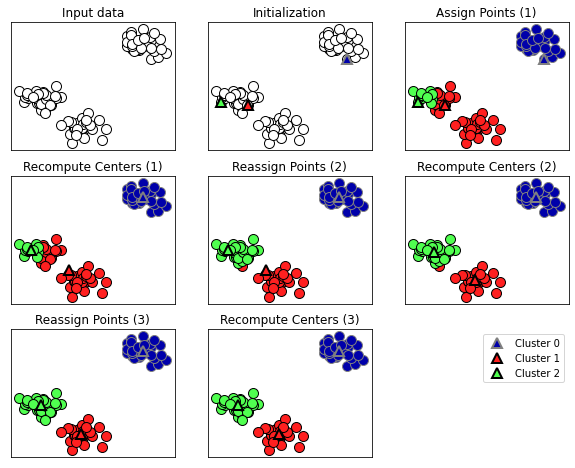

In [2]:
mglearn.plots.plot_kmeans_algorithm()

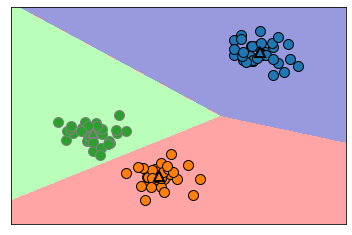

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# 載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#  隨機產生 100 個資料點，並分成兩個群體，各別數量為 50 個
X = -2 * np.random.rand(100, 2)
X1 = 1 + 2 * np.random.rand(50, 2)
X[50:100, :] = X1

In [6]:
X[:10]

array([[-1.47757074, -0.35917994],
       [-1.4617046 , -0.96331996],
       [-1.16107641, -0.9092118 ],
       [-1.50477845, -0.63239381],
       [-1.9481392 , -0.8108747 ],
       [-1.80291663, -1.24088053],
       [-1.33462137, -0.80577986],
       [-1.16685158, -1.76678967],
       [-0.57748622, -1.55964779],
       [-1.77801528, -1.1411881 ]])

In [7]:
X[-10:]

array([[1.05146066, 2.63141549],
       [2.18679778, 1.56691725],
       [1.71714003, 1.67999776],
       [1.49661721, 2.94267944],
       [1.68584077, 1.56379485],
       [1.79093893, 1.85218169],
       [1.86384785, 2.36590401],
       [1.10294191, 2.97575925],
       [1.60980233, 1.52220646],
       [1.7392673 , 2.64110142]])

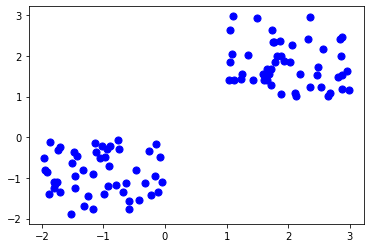

In [8]:
# 以圖形顯示各點的分佈
plt.scatter(X[ :, 0], X[ :, 1], s = 50, c = 'b')

plt.show()

In [9]:
# 使用 Scikit-learn 套件
from sklearn.cluster import KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True,n_jobs=1,algorithm=’auto’)

重要參數：
- n_clusters：表示分群的數量
- init：質心初始方式，參數有 'K-Means++'、'random'
- n_init：表示以獨立不同的、隨機選取執行，執行 k-means 演算法 10 次，並以最低 SSE 的模型，作爲最後的模型
- max_iter：每次執行的最大迭代次數（預設為 300）
- tol：可容許誤差（預設為 1e-04(0.0001)）   控制集群內誤差平方和的可容許誤差

屬性：

- cluster_centers_：產生集群的質心向量
- labels_：產生了每個資料點所屬的群的標記
- inertia_：產生每個資料點距離它最近的群中心的距離之和

方法：

- fit(X[,y])：訓練模型
- predict：預測資料點所屬的群
- fitpredict(X[,y])：訓練模型並預測每個資料點所在的群，等同於先使用fit，之後再用predict方法
- score(X[,y])：產生資料點距離一個群中心的偏移量的相反數

In [10]:
# K = 2 設定為兩群
Kmean = KMeans(n_clusters = 2, init = 'random')
Kmean.fit(X)

KMeans(init='random', n_clusters=2)

In [11]:
# 檢視每群的中心點位置
Kmean.cluster_centers_

array([[-1.07904968, -0.88860619],
       [ 1.97648422,  1.78662812]])

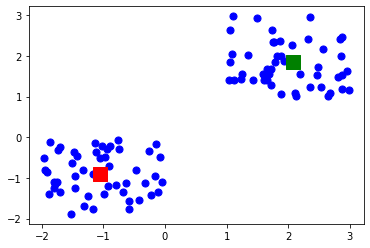

In [12]:
# 將中心點繪製於圖上
plt.scatter(X[ :, 0], X[ :, 1], s = 50, c = 'b')
plt.scatter(2.07708511,  1.84980314, s = 200, c = 'g', marker = 's')
plt.scatter(-1.05520904, -0.91008718, s = 200, c = 'r', marker = 's')

plt.show()

In [13]:
# 取得 K-means 對於數據集 labels 的屬性
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
# 使用新資料來進行預測
sample_test = np.array([-3.0, -2.0])
second_test = sample_test.reshape(1, -1)
second_test

array([[-3., -2.]])

In [15]:
Kmean.predict(second_test)

array([0])

# 練習

以下為隨機產生四組的資料，請用 k-mean 演算法將之分群

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X_1, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

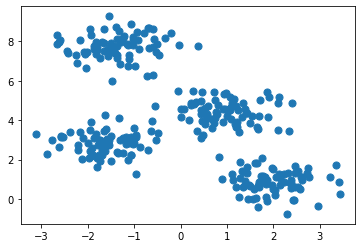

In [18]:
plt.scatter(X_1[:, 0], X_1[:, 1], s = 50)

In [19]:
from sklearn.cluster import KMeans

In [20]:
"""
Your Code Here
"""
# init請設定為random
kmeans = 
kmeans.fit()
y_kmeans = 

SyntaxError: invalid syntax (<ipython-input-20-496d177b5f43>, line 5)

利用著色標籤資料來視覺化，並標出被 k-means 評估器所決定出的群組中心

In [21]:
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

NameError: name 'y_kmeans' is not defined

先前的方式是採用隨機選取初始質心的傳統 k-means 演算法，這種方式會遇到如果初始質心選取不好時，會導致很差的計算結果，且也可能會導致收斂過程過於緩慢

解決方式：

- 對一個數據集執行多次 k-means 演算法，選擇 SSE 表現最好的模型
- 使用 k-means++ 演算法，在選取初始質心時，盡可能地讓他們彼此遠離 (http://ilpubs.stanford.edu/778/1/2006-13.pdf)

In [22]:
# K = 2 設定為兩群
Kmean = KMeans(n_clusters = 2, init = 'k-means++')
Kmean.fit(X)

KMeans(n_clusters=2)

In [24]:
Kmean.cluster_centers_

array([[-1.07904968, -0.88860619],
       [ 1.97648422,  1.78662812]])

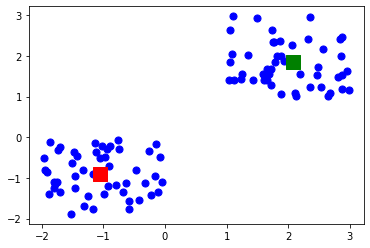

In [25]:
# 將中心點繪製於圖上
plt.scatter(X[ :, 0], X[ :, 1], s = 50, c = 'b')
plt.scatter(2.07708511,  1.84980314, s = 200, c = 'g', marker = 's')
plt.scatter(-1.05520904, -0.91008718, s = 200, c = 'r', marker = 's')

plt.show()

# 尋找最佳群數的方法

透過集群內誤差平方和（SSE）的資訊，來對一個集群使用一個稱為**轉折判斷法**的圖形工具，來估計最佳的集群數目 k

In [26]:
# 讀取集群內誤差平方和
Kmean.inertia_

60.87478144294905

## 利用轉折判斷法來找

In [30]:
from sklearn.datasets import make_blobs

In [31]:
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

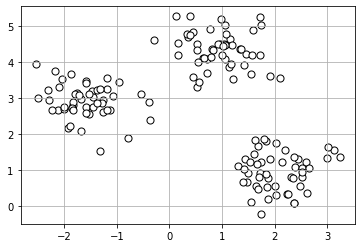

In [32]:
plt.scatter(X[:, 0], X[:, 1], c = 'white', marker = 'o', edgecolor = 'black', s = 50)
plt.grid()

plt.show()

In [33]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters = i,
                        init = 'k-means++',
                        n_init = 10,
                        max_iter = 300,
                        random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

C:\Users\9mzx8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


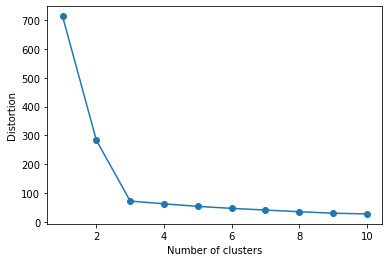

In [34]:
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

# Hierarchical clustering

可以透過繪製樹狀圖來了解分群的內容，並且具有解釋的結果，且一個優點是不需要事先指定要分群的數目

Hierarchical clustering 的兩種方法是**凝聚分層級群（agglomerative hierarchical clustering）**和**分離分層集群（divisive hierarchical clustering）**

- 凝聚分層集群（agglomerative hierarchical clustering）一開始每個資料點都視為一個單獨的集群，然後將最相近的集群合併，直到最後只存在一個集群
- 分離分層集群（divisive hierarchical clustering）與上面相反，一開始所有樣本都在一個集群中，之後反覆地將該集群分割成更小的群，直到每個群只包含一個樣本

凝聚分層集群與 k-means 的關鍵方式在於不是選擇多個集群並以隨機質心開始，而是從數據集中的每個點開始作為“集群”。然後找到兩個最接近的點並將它們組合成一個集群。然後，再找到下一個最近的點，然後它們成為一個群。重複這個過程，直到只有一個巨大的集群為止。

In [35]:
import mglearn

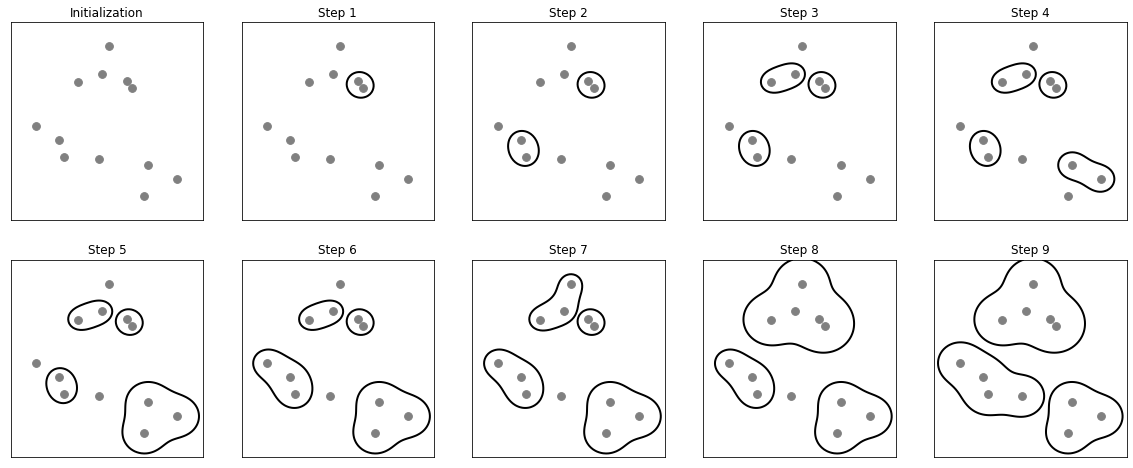

In [36]:
mglearn.plots.plot_agglomerative_algorithm()

最開始，每個點自成一簇。然後在每一個步驟中，相距最近的兩個群被合併。在前四個步驟中，選出兩個單點群並將其合併成兩點群。在步驟5（Step 5）中，其中一個兩點群被擴展到三個點，以此類推。在步驟9（Step 9）中，只剩下3 個簇。由於是指定尋找3 個群，因此算法結束。

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

In [38]:
# 隨機產生資料
X, y = make_blobs(random_state = 1)

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=<function mean>)

重要參數：

- n_clusters： 分群的個數 
- affinity：計算距離的方法，預設是 'euclidean'（即 'l2'，歐氏距離）
- compute_full_tree：通常當訓練了 n_clusters 後，訓練過程就會停止，但是如果 compute_full_tree=True，則會繼續訓練生成一顆完整的樹
- linkage：計算集群間距離的方法，參數有 'ward', 'complete', 'average'
               'ward'：所有集群的變異數（方差）和
               'complete'：取兩個集合中距離最遠的兩個點的距離作為兩個集群的距離
               'average'：把兩個集群中的點兩兩的距離全部放在一起求一個平均值

屬性：

- labels：每個資料點的群標記
- n_leaves_：分層樹的葉節點數量
- n_components：連接圖中連通分量的估計值
- children：一個 array，產生每個非節點數量

方法：

- fit(X[,y])：訓練樣本
- fit_predict(X[,y])：訓練模型並預測每個資料點的群標記

In [39]:
agg = AgglomerativeClustering(n_clusters = 3)
agg.fit_predict(X)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

由於算法的工作原理，凝聚算法不能對新數據點做出預測。因此 AgglomerativeClustering 沒有predict 方法。為了構造模型並得到訓練集上群的成員關係，可使用 fit_predict

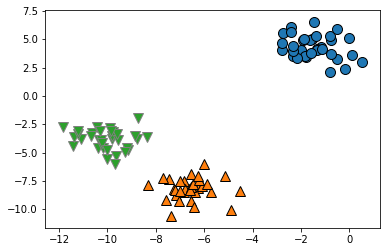

In [40]:
# 繪圖
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)

In [41]:
from scipy.cluster.hierarchy import dendrogram, ward

In [42]:
X, y = make_blobs(random_state = 0, n_samples = 12)

- 對資料矩陣 X 應用 ward 分群  
- SciPy ward 函式回傳一個指定距離的矩陣  
- 執行凝聚分群時介接

In [43]:
# 對資料矩陣 X 應用 ward 分群
linkage_array = ward(X)

Text(0, 0.5, 'Cluster distance')

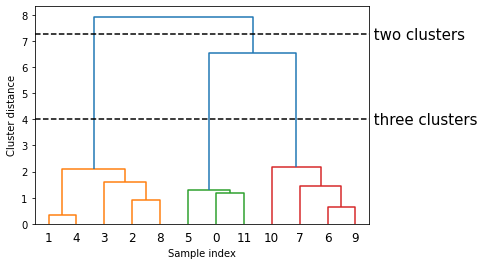

In [44]:
# 為包含群之間距離的 linkage_array 繪製樹狀圖
dendrogram(linkage_array)

# 顯示分成兩群及三群的切線
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c = 'k')
ax.plot(bounds, [4, 4], '--', c = 'k')

ax.text(bounds[1], 7.25, ' two clusters', va = 'center', fontdict = {'size': 15})
ax.text(bounds[1], 4, ' three clusters', va = 'center', fontdict = {'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

# 練習

In [45]:
from sklearn.datasets import make_blobs

In [46]:
X, y = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

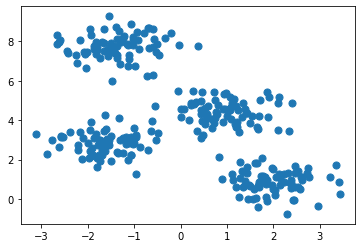

In [47]:
plt.scatter(X_1[:, 0], X_1[:, 1], s = 50)

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
"""
Your Code Here
"""
agg = 
assignment = agg.fit_predict()

In [ ]:
# 繪圖
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)

# DBSCAN

這種密度分群（Density-based Clustering）多是假設集群結構能夠透過樣本分佈的緊密程度來確定

其中 DBSCAN 是最常用的一種方法，原理是透過識別特徵空間的“擁擠”區域中的，在這些區域中許多資料點靠近在一起。這些區域被稱為特征空間的密集（dense）區域。集群成為資料的密集區域，並由相對較空的區域所分隔開

在 DBSCAN 中，密度的觀念被定義為：在指定的半徑 $\epsilon$ 之內，樣本的個數

優點是不需要先設置群的個數，可以劃分具有複雜形狀的群，還可找出不屬於任何群的點

但在運算上 DBSCAN 比先前介紹的幾種方式較慢，但對於相對較大的資料集還是可以使用

In [ ]:
import mglearn

In [ ]:
mglearn.plots.plot_dbscan()

上圖顯示由 DBSCAN 改變 min_samples 和 eps 參數的設置所找到的群分配

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

plt.show()

使用 K-means 和 Agglomerative Hierarchical Clustering

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))

km = KMeans(n_clusters = 2, random_state = 0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], edgecolor = 'black', c = 'lightblue', marker = 'o', s = 40, label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], edgecolor = 'black', c = 'red', marker = 's', s = 40, label = 'cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c = 'lightblue', edgecolor = 'black', marker='o', s = 40, label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c = 'red', edgecolor= 'black',marker='s', s = 40, label = 'cluster 2')
ax2.set_title('Agglomerative  hierarchical clustering')

plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

sklearn.cluster.DBSCAN(eps=0.5,min_samples=5,metric='euclidean',algorithm='auto',leaf_size=30,p=None,random_state=None)

重要參數：

- eps：  $\epsilon$ 參數，用於確定鄰域大小 
- min_samples：MinPts 參數，用於判斷核心對象
- algorithm：計算兩點間距離並找出最近鄰的點，參數有
                   auto：由算法自動選擇合適的算法
                   ball_tree：用 ball 樹來搜索
                   kd_tree：用 kd 樹搜索
                   brute：暴力搜索 
- leaf_size：用於指定當 algorithm=ball_tree 或 kd_tree 時，樹的葉節點大小               

屬性：

- core_sample_indices_：核心樣本在原始訓練集中的位置
- components_：核心樣本的一份副本
- labels_：每個資料點所屬的群標記。如果是雜訊資料點，則群標記會為-1副本

方法：

- fit(X[,y,sample_weight])：訓練模型
- fit_predict(X[,y,sample_weight])：訓練模型並預測每個資料點所屬的群標記

In [ ]:
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)

In [ ]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c = 'lightblue', marker = 'o', s = 40, edgecolor = 'black', label = 'cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c = 'red', marker = 's', s = 40, edgecolor = 'black', label = 'cluster 2')
plt.legend()
plt.tight_layout()

plt.show()

另外的例子

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# 隨機生成資料點
X, y = make_blobs(random_state = 170, n_samples = 600, centers = 5)
rng = np.random.RandomState(74)
transformation = rng.normal(size = (2, 2))
X = np.dot(X, transformation)

In [ ]:
# 繪製成圖
plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [ ]:
# 使用 K-meas 算法
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
# 繪製分群結果
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '^', c = [0, 1, 2, 3, 4],  s = 100,   linewidth = 2, cmap = 'plasma')

In [ ]:
# 使用 DBSCAN 算法
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
# 繪製分群結果
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap = 'plasma')